In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime
import os

### Calcoli

In [77]:
dati = pd.read_csv('bitcoin_data.csv')
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])
data_inizio = '2020-03-01'
data_fine = '2021-03-01'
# data_inizio = '2021-11-09'
# data_fine = '2022-12-01'
data1 = datetime.strptime(data_inizio, '%Y-%m-%d')
data2 = datetime.strptime(data_fine, '%Y-%m-%d')
lunghezza_periodo = (data2-data1).days

indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]

indice_fine = dati[dati['Timestamp'] == data_fine].index[0]

dati = dati[indice_inizio:indice_fine + 1]
dati = dati.reset_index(drop=True)

lista_guad_mdn = []
lista_guad_mdn_lun = []
lista_mdn = []
nome_variabile = 'quantità_VA'

for quantità_VA in range(1, 100):
    tabella_finale = dati.copy()

    dollari_in_banca = 100000
    deposito_YP = 0
    deposito_iniziale = 1000
    bitcoin_YP = 0
    bitcoin_YP_in_dollari = 0
    perc_tassa_acquisto = 0.002
    liquidità_ist = 0
    liquidità_cumulativa = 0
    ricarica_cumulativa = 0
    obiettivo_cumulativo = 0
    tasse_pagate_ist = 0
    tasse_pagate = 0

    tabella_finale.rename(columns={'Timestamp': 'Data'}, inplace=True)
    tabella_finale.rename(columns={'Price': 'Prezzo bitcoin in $'}, inplace=True)
    tabella_finale['Deposito su YP in $'] = 0
    tabella_finale['Deposito su YP + liquidità cumulativa in $'] = 0
    tabella_finale['Bitcoin su YP'] = 0
    tabella_finale['Bitcoin su YP in $'] = 0
    tabella_finale['Ritiro per strategia Giacomo in $'] = 0
    tabella_finale['Soldi in banca in $'] = dollari_in_banca
    tabella_finale['Vendita effettuata'] = False
    tabella_finale['Liquidità istantanea'] = 0
    tabella_finale['Liquidità cumulativa'] = 0
    tabella_finale['Obiettivo'] = '-' # La popolo successivamente
    tabella_finale['Obiettivo "cumulativo"'] = 0 # La popolo successivamente
    tabella_finale['Obiettivo "cumulativo" - bitcoin su YP in $'] = 0
    tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'] = 0
    tabella_finale['Ricarica istantanea per VA'] = 0
    tabella_finale['Ricarica cumulativa per VA'] = 0
    tabella_finale['Tasse pagate istantanee'] = 0
    tabella_finale['Tasse pagate cumulative'] = 0

    prezzo_attuale = tabella_finale['Prezzo bitcoin in $'][0]

    # Variabili
    strategia_giacomo = False
    strategia_VA = True
    investimento_base = 0 # Quanti $ di bitcoin compro il primo giorno; è anche la soglia per sapere se ritirare l'eccesso dei soldi
    perc_ritiro = 0.9346283471603228
    tempo_controllo = lunghezza_periodo - 1 # Ogni quanti giorni controllo se c'è da ritirare l'eccesso dei soldi rispetto all'investimento_base
    tempo_acquisto_VA = 1 # Ogni quanti giorni faccio in modo di comprare (o eventualmente vendere se vendita_VA = True) bitcoin in modo che il totale valga quanto stabilito dall'obiettivo di quel giorno (ad esempio potrei avere come obiettivo il secondo giorno 200$, il terzo giorno 300$ e così via)
    quantità_VA = 10 # ogni tempo_acquisto_VA giorni compro bitcoin in $ pari al valore che serve per avere quantità_VA $ in più rispetto alla volta precedente (in particolare tempo_acquisto_VA giorni prima); quindi inizialmente ho bitcoin con valore quantità_VA $, poi tempo_acquisto_VA giorni dopo ne avrò in modo che valgano 2*quantità_VA $, poi tempo_acquisto_VA giorni dopo avrò 3*quantità_VA $ e così via
    vendita_VA = False # se è True, significa che è possibile anche che si venda nel caso in cui il valore obiettivo del portafoglio di quel giorno debba essere inferiore a quello che in realtà ho già; se invece è False, in un caso del genere non si fa niente
    fare_prima_VA = True # se è True, viene fatto prima (eventualmente) il value averaging e poi si ritira (eventualmente) la differenza tra i dollari posseduti su YP e l'investimento iniziale, altrimenti viceversa
    def bitcoin_in_dollari(bitcoin, prezzo_bitcoin):
        return bitcoin * prezzo_bitcoin

    def dollari_in_bitcoin(dollari, prezzo_bitcoin):
        return dollari / prezzo_bitcoin
    # Ricarica iniziale del deposito di YP
    dollari_in_banca -= deposito_iniziale
    deposito_YP += deposito_iniziale
    # Acquisto bitcoin su YP per la prima volta, prima di cominciare il ciclo con le mie strategie
    deposito_YP -= investimento_base * (1 + perc_tassa_acquisto)
    bitcoin_YP += dollari_in_bitcoin(investimento_base, prezzo_attuale)
    # print('Prezzo attuale:', prezzo_attuale)
    # print('bitcoin_YP', bitcoin_YP)
    bitcoin_YP_in_dollari += investimento_base
    tasse_pagate_ist = perc_tassa_acquisto * investimento_base
    tasse_pagate += perc_tassa_acquisto * investimento_base
    # bitcoin_YP_in_dollari += investimento_base # In realtà lo faccio già dopo, durante il ciclo for

    tabella_finale['Deposito su YP in $'][0] = deposito_YP
    tabella_finale['Deposito su YP + liquidità cumulativa in $'][0] = deposito_YP + liquidità_cumulativa
    tabella_finale['Bitcoin su YP'][0] = bitcoin_YP
    tabella_finale['Bitcoin su YP in $'][0] = bitcoin_YP_in_dollari
    tabella_finale['Ritiro per strategia Giacomo in $'][0] = 0
    tabella_finale['Soldi in banca in $'][0] = dollari_in_banca
    tabella_finale['Vendita effettuata'][0] = False
    tabella_finale['Liquidità istantanea'][0] = liquidità_ist
    tabella_finale['Liquidità cumulativa'][0] = liquidità_cumulativa
    tabella_finale['Obiettivo'][0] = 0
    tabella_finale['Obiettivo "cumulativo"'][0] = 0
    tabella_finale['Obiettivo "cumulativo" - bitcoin su YP in $'][0] = 0
    tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][0] = deposito_YP + bitcoin_YP_in_dollari + liquidità_cumulativa
    tabella_finale['Ricarica istantanea per VA'][0] = 0
    tabella_finale['Ricarica cumulativa per VA'][0] = ricarica_cumulativa
    tabella_finale['Tasse pagate istantanee'][0] = tasse_pagate_ist
    tabella_finale['Tasse pagate cumulative'][0] = tasse_pagate


    for t in range(1, len(dati)):
            # print(tasse_pagate)
            liquidità_ist = 0
            prezzo_attuale = tabella_finale['Prezzo bitcoin in $'][t]
            # print('Prezzo attuale:', prezzo_attuale)
            bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)
            # print(bitcoin_YP_in_dollari) 

            if fare_prima_VA:
                    if t % tempo_acquisto_VA == 0 and strategia_VA: # Se è un giorno in cui voglio comprare altri bitcoin
                            obiettivo = quantità_VA * t // tempo_acquisto_VA
                            obiettivo_cumulativo += quantità_VA
                            # print('Obiettivo:', obiettivo)
                            ricarica = obiettivo - bitcoin_YP_in_dollari
                            # print('Ricarica:', ricarica)
                            # print('Bitcoin YP', bitcoin_YP)
                            # print('Bitcoin YP in $', bitcoin_YP_in_dollari)
                            liquidità = quantità_VA - ricarica
                            if liquidità >= 0 and liquidità <= quantità_VA:
                                    liquidità_ist = liquidità
                                    liquidità_cumulativa += liquidità
                            elif liquidità > quantità_VA:
                                    liquidità_ist = quantità_VA
                                    liquidità_cumulativa += quantità_VA
                            # Questo else è superfluo perchè il fondo liquidità è già 0 di base, inoltre aggiungere 0 è come non fare nulla, ma lo lascio per chiarezza
                            # else:
                            #         liquidità_ist = 0
                            #         liquidità_cumulativa += 0

                            if ricarica >= 0:
                                    # Se non ci sono abbastanza soldi nel deposito, prendo tutto dal deposito e quello che manca dalla liquidità accumulata
                                    if ricarica * (1 + perc_tassa_acquisto) <= deposito_YP:
                                            deposito_YP -= ricarica * (1 + perc_tassa_acquisto)
                                            tasse_pagate_ist = perc_tassa_acquisto * ricarica
                                            tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                            tasse_pagate += perc_tassa_acquisto * ricarica
                                    else:
                                            liquidità_cumulativa -= ricarica * (1 + perc_tassa_acquisto) - deposito_YP
                                            deposito_YP = 0
                                            tasse_pagate_ist = perc_tassa_acquisto * ricarica
                                            tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                            tasse_pagate += perc_tassa_acquisto * ricarica
                                    bitcoin_YP += dollari_in_bitcoin(ricarica, prezzo_attuale)
                                    bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)
                                    ricarica_cumulativa += ricarica
                                    tabella_finale['Ricarica istantanea per VA'][t] = ricarica
                            elif vendita_VA:
                                    tabella_finale['Vendita effettuata'][t] = True
                                    deposito_YP -= ricarica * (1 - perc_tassa_acquisto) # aumenta il deposito perchè qui ricarica è negativa; poi ci sono le tasse anche sulla vendita
                                    tasse_pagate_ist = -perc_tassa_acquisto * ricarica
                                    tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                    tasse_pagate -= perc_tassa_acquisto * ricarica # anche qui è importante ricordare il "-" perchè ricarica è negativa
                                    bitcoin_YP += dollari_in_bitcoin(ricarica, prezzo_attuale) # calano perchè qui ricarica è negativa
                                    bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)

                            tabella_finale['Obiettivo'][t] = obiettivo

                    if t % tempo_controllo == 0 and strategia_giacomo:
                            if bitcoin_in_dollari(bitcoin_YP, prezzo_attuale) > investimento_base:
                                    ritiro_in_dollari = (bitcoin_in_dollari(bitcoin_YP, prezzo_attuale) - investimento_base) * perc_ritiro
                                    tabella_finale['Ritiro per strategia Giacomo in $'][t] = ritiro_in_dollari
                                    deposito_YP += ritiro_in_dollari * (1 - perc_tassa_acquisto)
                                    tasse_pagate_ist = perc_tassa_acquisto * ritiro_in_dollari
                                    tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                    tasse_pagate += perc_tassa_acquisto * ritiro_in_dollari
                                    bitcoin_YP -= dollari_in_bitcoin(ritiro_in_dollari, prezzo_attuale)
                                    bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)
                            
            else:

                    if t % tempo_controllo == 0 and strategia_giacomo:
                            if bitcoin_in_dollari(bitcoin_YP, prezzo_attuale) > investimento_base:
                                    ritiro_in_dollari = (bitcoin_in_dollari(bitcoin_YP, prezzo_attuale) - investimento_base) * perc_ritiro
                                    tabella_finale['Ritiro per strategia Giacomo in $'][t] = ritiro_in_dollari
                                    deposito_YP += ritiro_in_dollari * (1 - perc_tassa_acquisto)
                                    tasse_pagate_ist = perc_tassa_acquisto * ritiro_in_dollari
                                    tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                    tasse_pagate += perc_tassa_acquisto * ritiro_in_dollari
                                    bitcoin_YP -= dollari_in_bitcoin(ritiro_in_dollari, prezzo_attuale)
                                    bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)
                    

                    if t % tempo_acquisto_VA == 0 and strategia_VA: # Se è un giorno in cui voglio comprare altri bitcoin
                            obiettivo = quantità_VA * t // tempo_acquisto_VA
                            obiettivo_cumulativo += quantità_VA
                            ricarica = obiettivo - bitcoin_YP_in_dollari
                            liquidità = quantità_VA - ricarica
                            if liquidità >= 0 and liquidità <= quantità_VA:
                                    liquidità_ist = liquidità
                                    liquidità_cumulativa += liquidità
                            elif liquidità > quantità_VA:
                                    liquidità_ist = quantità_VA
                                    liquidità_cumulativa += quantità_VA
                            # Questo else è superfluo perchè il fondo liquidità è già 0 di base, inoltre aggiungere 0 è come non fare nulla, ma lo lascio per chiarezza
                            # else:
                            #         liquidità_ist = 0
                            #         liquidità_cumulativa += 0

                            if ricarica >= 0:
                                    # Se non ci sono abbastanza soldi nel deposito, prendo tutto dal deposito e quello che manca dalla liquidità accumulata
                                    if ricarica * (1 + perc_tassa_acquisto) <= deposito_YP:
                                            deposito_YP -= ricarica * (1 + perc_tassa_acquisto)
                                            tasse_pagate_ist = perc_tassa_acquisto * ricarica
                                            tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                            tasse_pagate += perc_tassa_acquisto * ricarica
                                    else:
                                            liquidità_cumulativa -= ricarica * (1 + perc_tassa_acquisto) - deposito_YP
                                            deposito_YP = 0
                                            tasse_pagate_ist = perc_tassa_acquisto * ricarica
                                            tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                            tasse_pagate += perc_tassa_acquisto * ricarica
                                    bitcoin_YP += dollari_in_bitcoin(ricarica, prezzo_attuale)
                                    bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)
                                    ricarica_cumulativa += ricarica
                                    tabella_finale['Ricarica istantanea per VA'][t] = ricarica
                            elif vendita_VA:
                                    tabella_finale['Vendita effettuata'][t] = True
                                    deposito_YP -= ricarica * (1 - perc_tassa_acquisto) # aumenta il deposito perchè qui ricarica è negativa; poi ci sono le tasse anche sulla vendita
                                    tasse_pagate_ist = -perc_tassa_acquisto * ricarica
                                    tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                    tasse_pagate -= perc_tassa_acquisto * ricarica # anche qui è importante ricordare il "-" perchè ricarica è negativa
                                    bitcoin_YP += dollari_in_bitcoin(ricarica, prezzo_attuale) # calano perchè qui ricarica è negativa
                                    bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)

                            tabella_finale['Obiettivo'][t] = obiettivo
                                    
            tabella_finale['Deposito su YP in $'][t] = deposito_YP
            tabella_finale['Deposito su YP + liquidità cumulativa in $'][t] = deposito_YP + liquidità_cumulativa
            tabella_finale['Bitcoin su YP'][t] = bitcoin_YP
            tabella_finale['Bitcoin su YP in $'][t] = bitcoin_YP_in_dollari
            tabella_finale['Liquidità istantanea'][t] = liquidità_ist
            tabella_finale['Liquidità cumulativa'][t] = liquidità_cumulativa
            tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][t] = deposito_YP + bitcoin_YP_in_dollari + liquidità_cumulativa
            tabella_finale['Ricarica cumulativa per VA'][t] = ricarica_cumulativa
            tabella_finale['Tasse pagate cumulative'][t] = tasse_pagate
            tabella_finale['Obiettivo "cumulativo"'][t] = obiettivo_cumulativo
            tabella_finale['Obiettivo "cumulativo" - bitcoin su YP in $'][t] = obiettivo_cumulativo - bitcoin_YP_in_dollari

    max_delta_neg = 0
    max_delta_pos = 0
    guadagno_finale = 0
    ind_neg = 'Nessuno'
    ind_pos = 'Nessuno'

    for index, i in enumerate(tabella_finale['Deposito su YP + liquidità cumulativa in $']):
        if deposito_iniziale - i > max_delta_neg:
            max_delta_neg = deposito_iniziale - i
            ind_neg = index

        if i - deposito_iniziale > max_delta_pos:
            max_delta_pos = i - deposito_iniziale
            ind_pos = index
    # print(max_delta_neg, max_delta_pos)
    # print(ind_neg, ind_pos)
    # if max_delta_neg > tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][0]:
    #     print(f"ATTENZIONE! IL DEPOSITO INIZIALE NON è SUFFICIENTE! CARICARE ALMENO DI {max_delta_neg}")
    guadagno_finale = tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][len(tabella_finale) - 1] - tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][0]

    lista_guad_mdn.append(guadagno_finale - max_delta_neg)
    lista_guad_mdn_lun.append((guadagno_finale - max_delta_neg) / lunghezza_periodo)
    lista_mdn.append(max_delta_neg)
    # print(guadagno_finale - max_delta_neg)
print(lista_guad_mdn)

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_84192\2304362644.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabella_finale['Deposito su YP in $'][0] = deposito_YP
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_84192\2304362644.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabella_finale['Deposito su YP + liquidità cumulativa in $'][0] = deposito_YP + liquidità_cumulativa
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_84192\2304362644.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

[1721.4872517021845, 3564.877590376678, 5384.804777544053, 7152.697633860735, 8903.914682083543, 10651.50002326732, 12396.554632505166, 14144.320350471426, 15882.171804148547, 17622.377636362136, 19361.153644504426, 21104.275719960267, 22845.553567235125, 24585.32207144184, 26325.326277856657, 28065.581074174825, 29805.846279437435, 31546.18602501971, 33286.58636108361, 35026.986697147506, 36767.51097022749, 38508.229492762744, 40248.94801529798, 41989.666537833225, 43730.63250643781, 45472.07022487322, 47213.50794330863, 48954.94566174403, 50696.38338017944, 52437.82109861484, 54179.25881705025, 55920.69653548565, 57662.88672866999, 59406.287495446966, 61147.641931549304, 62888.99636765162, 64630.35080375393, 66371.70523985627, 68113.05967595856, 69854.4141120609, 71595.76854816322, 73337.12298426554, 75078.47742036787, 76819.83185647019, 78561.18629257251, 80302.54072867484, 82043.89516477715, 83785.24960087948, 85526.6040369818, 87267.95847308412, 89009.93625480539, 90751.2780279740

In [78]:
lista_guad_mdn

[1721.4872517021845,
 3564.877590376678,
 5384.804777544053,
 7152.697633860735,
 8903.914682083543,
 10651.50002326732,
 12396.554632505166,
 14144.320350471426,
 15882.171804148547,
 17622.377636362136,
 19361.153644504426,
 21104.275719960267,
 22845.553567235125,
 24585.32207144184,
 26325.326277856657,
 28065.581074174825,
 29805.846279437435,
 31546.18602501971,
 33286.58636108361,
 35026.986697147506,
 36767.51097022749,
 38508.229492762744,
 40248.94801529798,
 41989.666537833225,
 43730.63250643781,
 45472.07022487322,
 47213.50794330863,
 48954.94566174403,
 50696.38338017944,
 52437.82109861484,
 54179.25881705025,
 55920.69653548565,
 57662.88672866999,
 59406.287495446966,
 61147.641931549304,
 62888.99636765162,
 64630.35080375393,
 66371.70523985627,
 68113.05967595856,
 69854.4141120609,
 71595.76854816322,
 73337.12298426554,
 75078.47742036787,
 76819.83185647019,
 78561.18629257251,
 80302.54072867484,
 82043.89516477715,
 83785.24960087948,
 85526.6040369818,
 87267

### Grafici

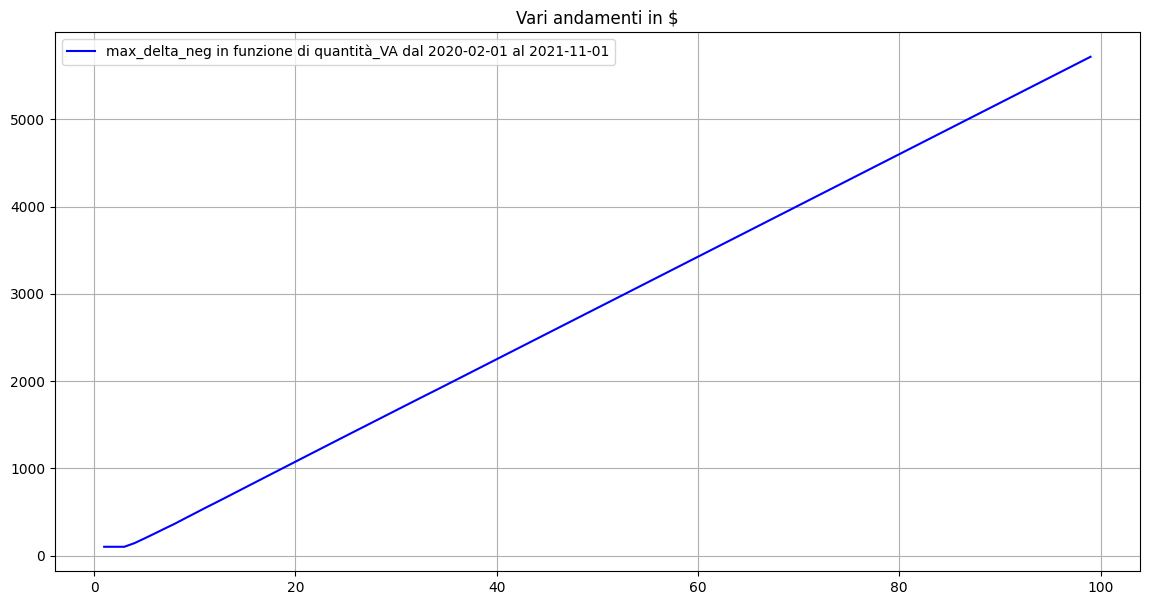

In [79]:
x = range(1,100)
y = lista_mdn
plt.figure(figsize=(14, 7))
plt.plot(x, y, label=f"max_delta_neg in funzione di {nome_variabile} dal {data_inizio} al {data_fine}", color='blue')
plt.title('Vari andamenti in $')
plt.grid(True)
plt.legend()
plt.show()

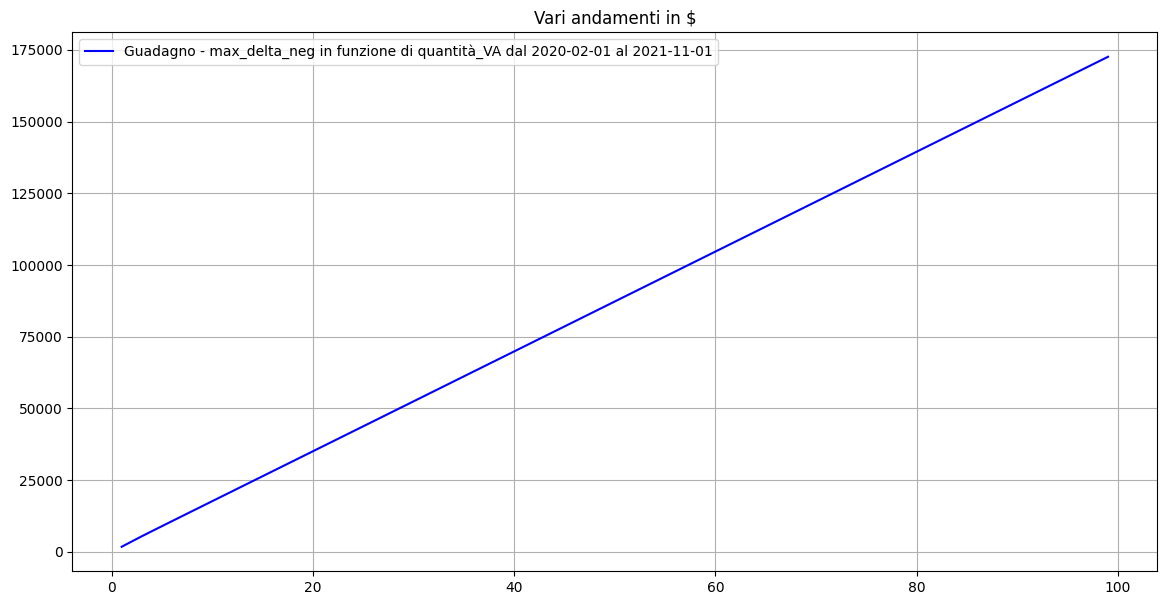

In [80]:
x = range(1,100)
y = lista_guad_mdn
plt.figure(figsize=(14, 7))
plt.plot(x, y, label=f"Guadagno - max_delta_neg in funzione di {nome_variabile} dal {data_inizio} al {data_fine}", color='blue')
plt.title('Vari andamenti in $')
plt.grid(True)
plt.legend()
plt.show()

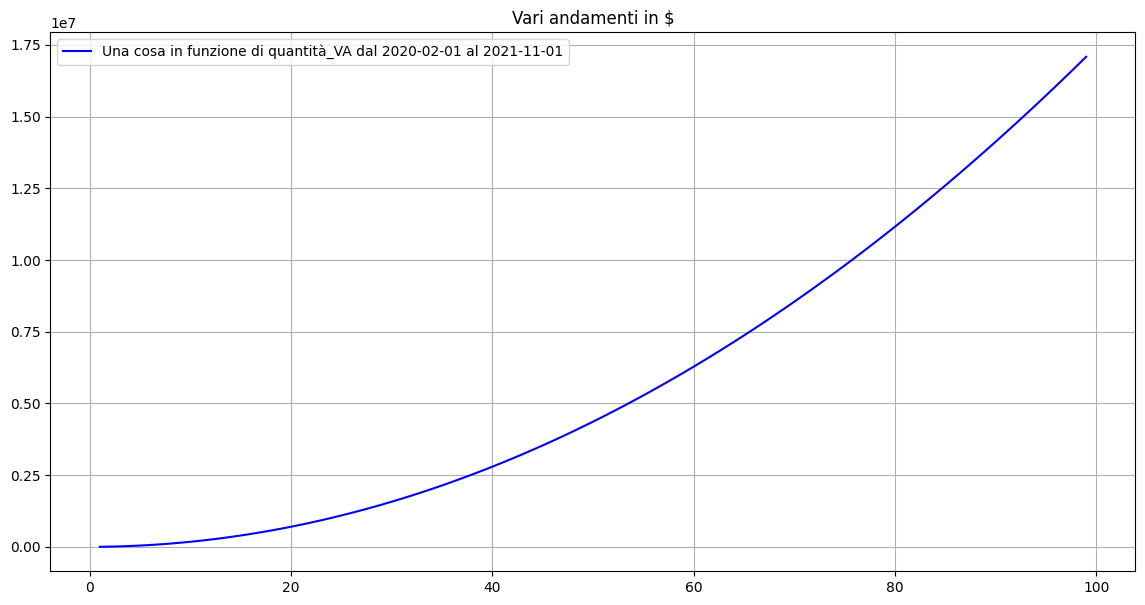

In [81]:
x = range(1,100)
y = [lista_guad_mdn[i-1] * i for i in range(1,100)]
plt.figure(figsize=(14, 7))
plt.plot(x, y, label=f"Una cosa in funzione di {nome_variabile} dal {data_inizio} al {data_fine}", color='blue')
plt.title('Vari andamenti in $')
# plt.xlabel('Quantità_VA')
# plt.ylabel('Variabili varie ($)')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
[lista_guad_mdn[i] * i for i in range(1,99)]

[3564.877590376678,
 10769.609555088105,
 21458.092901582204,
 35615.65872833417,
 53257.500116336596,
 74379.32779503099,
 99010.24245329999,
 127057.37443318838,
 158601.39872725922,
 193611.53644504427,
 232147.03291956295,
 274146.6428068215,
 319609.1869287439,
 368554.5678899932,
 420983.71611262235,
 476893.54047099897,
 536285.162425335,
 599158.554499505,
 665512.7472458027,
 735350.2194045498,
 808672.8193480177,
 885476.8563365556,
 965762.3303701642,
 1049535.1801545075,
 1136801.7556218305,
 1227551.2065260243,
 1321783.532867089,
 1419498.7346450244,
 1520696.8118598303,
 1625377.7645115075,
 1733541.5926000553,
 1845212.3753174397,
 1960407.4873497498,
 2079019.8256726763,
 2201114.872867807,
 2326692.6289351415,
 2455753.0938746817,
 2588296.2676864252,
 2724322.1503703753,
 2863830.741926529,
 3006822.0423548874,
 3153296.0516554504,
 3303252.769828218,
 3456692.196873191,
 3613614.332790368,
 3774019.177579749,
 3937906.7312413356,
 4105276.993775126,
 4276129.9651811